# Analyzing A Scalar Field

The Maxwell equations were derived in another Jupyter notebook [pdf](http://dougsweetser.github.io/Q/EM/2022-02-06__Maxwell_derivation.pdf) or [ipynb](http://dougsweetser.github.io/Q/EM/2022-02-06__Maxwell_derivation.ipynb) using real-valued space-time number operators and potentials. Once one gets to the Lorentz invariant difference of fields, $B^2 - E^2$, the rest is the work of the Euler-Lagrange equations. Because photons are massless, that requires a step where a scalar field is set to zero.

This notebook started as an exact copy of the Maxwell derivation. Here a variation is done: imagine the system under study is electrically neutral. Now put the scalar field through the same algebraic machinery that produced the Maxwell equations. Then have fun interpreting the result.

Load the needed libraries. Note that Qs.py is a library for manipulating space-time numbers and space-time number series written by the author.

In [1]:
%%capture
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
import unittest

# To get equations the look like, well, equations, use the following.
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from IPython.display import display

# Tools for manipulating quaternions.
from Qs import *

from IPython.core.display import display, HTML, Math, Latex
display(HTML("<style>.container { width:100% !important; }</style>"))

The first thing to do is define variables and functions for sympy to use and define the potential.

In [2]:
t, x, y, z = sp.symbols("t x y z")
φ, Ax, Ay, Az = sp.Function("φ"), sp.Function("Ax"), sp.Function("Ay"), sp.Function("Az")
φ(t, x, y, z).diff(t)

In [3]:
space_time_potential = Q([φ(t, x, y, z), Ax(t, x, y, z), Ay(t, x, y, z), Az(t, x, y, z)])
simpler = {φ(t, x, y, z): "φ", Ax(t, x, y, z): "Ax", Ay(t, x, y, z): "Ay", Az(t, x, y, z): "Az"}
space_time_potential.subs(simpler).print_state("space-time potential")

space-time potential
(φ, Ax, Ay, Az) 



Take the space-time number derivative of the space-time potential.

D space-time_potential


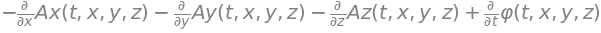

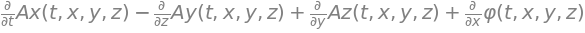

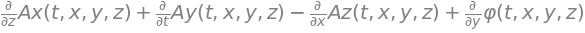

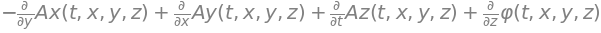

In [4]:
D_space_time_potential = Dq(space_time_potential, [t, x, y, z])
D_space_time_potential.display("D space-time_potential")

While this answer is correct, it has too many marks to be understood with ease. Create a list of substitutions that can do all the basic EM fields.

In [5]:
fields = {-Ax(𝑡,𝑥,𝑦,𝑧).diff(x)-Ay(𝑡,𝑥,𝑦,𝑧).diff(y)-Az(𝑡,𝑥,𝑦,𝑧).diff(z)+φ(𝑡,𝑥,𝑦,𝑧).diff(t): "g",-Ax(𝑡,𝑥,𝑦,𝑧).diff(t)-φ(𝑡,𝑥,𝑦,𝑧).diff(x): "Ex", -Ay(𝑡,𝑥,𝑦,𝑧).diff(t)-φ(𝑡,𝑥,𝑦,𝑧).diff(y): "Ey", -Az(𝑡,𝑥,𝑦,𝑧).diff(t)-φ(𝑡,𝑥,𝑦,𝑧).diff(z): "Ez",
         Az(𝑡,𝑥,𝑦,𝑧).diff(y)-Ay(𝑡,𝑥,𝑦,𝑧).diff(z): "Bx", Ax(𝑡,𝑥,𝑦,𝑧).diff(z)-Az(𝑡,𝑥,𝑦,𝑧).diff(x): "By", Ay(𝑡,𝑥,𝑦,𝑧).diff(x)-Ax(𝑡,𝑥,𝑦,𝑧).diff(y): "Bz", 
          φ(t, x, y, z): "φ", Ax(t, x, y, z): "Ax", Ay(t, x, y, z): "Ay", Az(t, x, y, z): "Az"}
D_space_time_potential.subs(fields).display("D space_time_potential fields")

D space_time_potential fields


The first term is a gauge field. It is invariant under a Lorentz transformation. For massless photons, the gauge field _G_ must be set to zero. In this notebook, we are going to study this field presuming the field is not about photons. Instead, presume the system under study is electrically neutral, so the electric and magnetic fields are zero for all inertial and non-inertial observers.

In [6]:
neutral_field = scalar_q(D_space_time_potential)
neutral_field.subs(fields).display("electrically neutral field")

electrically neutral field


Why is the gauge field _G_ invariant under a Lorentz transformation? Because it is the product of two space-time number expressions and only generates a scalar term.

Square this field just like the electric and magnetic fields got squared.

In [7]:
neutral_field_squared = square(neutral_field)
neutral_field_squared.subs(fields).display("electrically neutral scalar field squared")

electrically neutral scalar field squared


Couple the potential to a mass current density as was done while deriving the Maxwell equations. The first term of the product of the potential with the current density is Lorentz invariant.

In [8]:
ρ, Jx, Jy, Jz = sp.symbols("ρ Jx Jy Jz")
current_density = Q([ρ, Jx, Jy, Jz])
current_potential = scalar_q(product(current_density, space_time_potential))
current_potential.display("current/potential coupling")

current/potential coupling


Apply the Euler-Lagrange equations to the first terms of the squared field and the current/potential coupling.

In [9]:
from sympy.calculus.euler import euler_equations

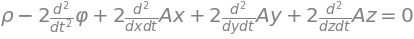

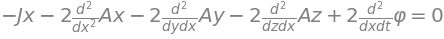

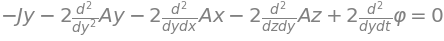

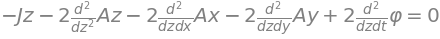

In [10]:
display(euler_equations(neutral_field_squared.t + current_potential.t , φ(t, x, y, z), [t, x, y, z])[0].subs(simpler))
display(euler_equations(neutral_field_squared.t + current_potential.t , Ax(t, x, y, z), [t, x, y, z])[0].subs(simpler))
display(euler_equations(neutral_field_squared.t + current_potential.t , Ay(t, x, y, z), [t, x, y, z])[0].subs(simpler))
display(euler_equations(neutral_field_squared.t + current_potential.t , Az(t, x, y, z), [t, x, y, z])[0].subs(simpler))

A nice thing about working with a scalar field is that the math is simple and direct. 

$$(\rho, J) = 2 \left(\frac{\partial^2 \phi}{\partial t^2} - \frac{\partial}{\partial t}(\nabla \cdot A), \vec{\nabla}\frac{\partial \phi}{\partial t} - \vec{\nabla} (\nabla \cdot A)\right)= 2 \left(\frac{\partial G}{\partial t}, \vec{\nabla} G\right)$$

There may be some who would argue that the **factor of 2** means. Since there are potential involved here, I don't know that it matters.

It would appear like there is a direct route between this expression and Newton's law of gravity:

$$\rho = \nabla^2 \phi$$

Choose a potential function that solves a homogeneous wave equation:

$$0 = \frac{\partial^2 \phi}{\partial t^2} - \nabla^2 \phi$$

The derived equation is more complicated that Newton's expression. Imagine that there was no divergence ($\nabla \cdot a = 0$) and that the system was static, along with the earlier assumptions that the system is electrically neutral. In that case, the derived equation is simply:

$$(\rho, \vec{0}) = \left(\frac{\partial^2 \phi}{\partial t^2}, \vec{0}\right)$$

For this particular situation, the equations are the same. The scalar field equations are more general and consistent with special relativity unlike Newton's law. This looks like progress to me...

## Solutions

See if we can find solutions to the above differential equations.

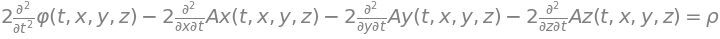

In [11]:
rho_eq = sp.Eq(2 * φ(t, x, y, z).diff(t, t) - 2 * Ax(t, x, y, z).diff(x, t) - 2 * Ay(t, x, y, z).diff(y, t) - 2 *Az(t, x, y, z).diff(z, t), ρ)
display(rho_eq)

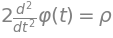

In [12]:
rho_no_div_eq = sp.Eq(2 * φ(t).diff(t, t), ρ)
display(rho_no_div_eq)

In [13]:
sp.dsolve(rho_no_div_eq, φ)

TypeError: 'property' object is not iterable

In [ ]:
f = sp.Function("f")(t)
r = sp.Symbol("r")

In [ ]:
f_dif_eq = sp.Eq(f.diff(t, t), r/2)
display(f_dif_eq)

In [ ]:
sp.dsolve(f_dif_eq, f)

In [ ]:
ax = sp.Function("ax")(t, x)
ay = sp.Function("ay")(t, y)
az = sp.Function("az")(t, z)

In [ ]:
f_axyz_dif_eq = sp.Eq(f.diff(t, t) - ax.diff(t, x) - ay.diff(t, y) - az.diff(t, z), r/2)
display(f_axyz_dif_eq)

In [ ]:
## too difficult to solve
##sp.dsolve(f_axyz_dif_eq, f)

In [ ]:
f_ax_dif_eq = sp.Eq(f.diff(t, t) - ax.diff(t, x), r/2)
display(f_ax_dif_eq)
sp.dsolve(f_ax_dif_eq, f)

In [ ]:
phixyz = sp.Function("phixyz")
Gauss_dif_eq = sp.Eq(-phixyz(x).diff(x, x) - phixyz(y).diff(y, y) - phixyz(z).diff(z, z), r)
display(Gauss_dif_eq)
sp.dsolve(Gauss_dif_eq, phixyz)